<a href="https://colab.research.google.com/github/thiagosouf/projeto1/blob/master/datascience02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install emoji

     |████████████████████████████████| 51kB 1.6MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49716 sha256=2f3082f04e78a16b6378b49b6b516022ffa99392798e46dfbc84c35f855cf4e1
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [2]:
# bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

import spacy
from   spacy  import displacy

import wordcloud
import emoji

import re

In [3]:
#ajustando a engine para lingua utilizada
myspacy = spacy.load("en_core_web_sm")

In [4]:
#some_text = é um exemplo de text que será usado para demonstrar a features do spacy
some_text = "Digital Humanities is a promissing area. Its a good area."

In [5]:
#Lê o some_text com o myspacy e coloca ele na variavel read_text
read_text = myspacy(some_text)
#printa em formato de token o texto do read_text
print([token.text for token in read_text])

['Digital', 'Humanities', 'is', 'a', 'promissing', 'area', '.', 'Its', 'a', 'good', 'area', '.']


In [6]:
#Separa o texto em frases
sentences = list(read_text.sents) #cria uma lista com elementos separados por sentenças
for sentence in sentences: #para cada sentença na variavel sentences
  print(sentence) #imprima sentença

Digital Humanities is a promissing area.
Its a good area.


In [7]:
#Remover as STOP WORDS
[token.text for token in read_text if not token.is_stop] 

['Digital', 'Humanities', 'promissing', 'area', '.', 'good', 'area', '.']

In [8]:
#Lema
lemas = [(word, word.lemma_) for word in read_text]

pd.DataFrame(columns =["Palavra","Lema"],data=lemas)

,Palavra,Lema
0,Digital,Digital
1,Humanities,Humanities
2,is,be
3,a,a
4,promissing,promissing
5,area,area
6,.,.
7,Its,-PRON-
8,a,a
9,good,good


In [11]:
#POS Tagging (classe gramatical, parte do discurso)
pos = [(word, word.pos_, spacy.explain(word.pos_)) for word in read_text]

pd.DataFrame(columns = ["Palavra", "POS", "Descrição"], data = pos)

,Palavra,POS,Descrição
0,Digital,PROPN,proper noun
1,Humanities,PROPN,proper noun
2,is,AUX,auxiliary
3,a,DET,determiner
4,promissing,ADJ,adjective
5,area,NOUN,noun
6,.,PUNCT,punctuation
7,Its,DET,determiner
8,a,DET,determiner
9,good,ADJ,adjective


In [14]:
#Arvore de dependencia
sample_text = "Digital Humanities is a promising area." #"Rainy weather."
read_text   = myspacy(sample_text)
displacy.render(read_text, style="dep")

'<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="en" id="cfb63f885af04af0939932996f383615-0" class="displacy" width="1100" height="399.5" direction="ltr" style="max-width: none; height: 399.5px; color: #000000; background: #ffffff; font-family: Arial; direction: ltr">\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="309.5">\n    <tspan class="displacy-word" fill="currentColor" x="50">Digital</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="50">PROPN</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="309.5">\n    <tspan class="displacy-word" fill="currentColor" x="225">Humanities</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="225">PROPN</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="309.5">\n    <tspan class="displacy-word" fill="currentColor" x="400">is</tspan>\n    <tspan class="d

In [15]:
#NER
sample_text = "Every year, Hyderabd hosts the biggest exhibition in India. It has fun rides and food stalls. At least a million people visit it every year."
#sample_text = some_text
read_text = myspacy(sample_text)
displacy.render(read_text, style="ent")

'<div class="entities" style="line-height: 2.5; direction: ltr">\n<mark class="entity" style="background: #bfe1d9; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Every year\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">DATE</span>\n</mark>\n, Hyderabd hosts the biggest exhibition in \n<mark class="entity" style="background: #feca74; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    India\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">GPE</span>\n</mark>\n. It has fun rides and food stalls. \n<mark class="entity" style="background: #e4e7d2; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    At least a million\n    <span style="font-size: 0.8

In [17]:
#EXEMPLO - LIMPANDO TWEETS
tweets = ["RT @john: The economy was growing 3 times faster before Covid 😒 ",
          "About Covid ... We should always use 😷 #usemask",
          "Covid ... take care all you!!!",
          "VIDEO: Sturgeon on post-election deals http://t.co/BTJwrpbmOY",
          "Covid: Total deaths in the U.S. has increased in recent days."
          "We must empathize with others. Do not spread this virus.",
          "There are promising vaccines in the third phase!!! 👊",
          "The economy must continue!!!"
         ]

In [18]:
#limpeza por expressao regulares (regex)
new_tweets = []
for tweet in tweets: 

    # remover "nova linha"
    tweet = re.sub(r'\n', ' . ', tweet)

    # remover "@nome"
    tweet = re.sub(r'@\w+', '', tweet)

    # remover "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remover hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

    # removendo hashtag + nome
    tweet = re.sub(r'#\w+', '', tweet)
    
    # removendo emojis com o pacote emoji
    tweet = emoji.get_emoji_regexp().sub(u'', tweet)
    
    new_tweets.append(tweet)

In [19]:
new_tweets

[': The economy was growing 3 times faster before Covid  ',
 'About Covid ... We should always use  ',
 'Covid ... take care all you!!!',
 'VIDEO: Sturgeon on post-election deals ',
 'Covid: Total deaths in the U.S. has increased in recent days.We must empathize with others. Do not spread this virus.',
 'There are promising vaccines in the third phase!!! ',
 'The economy must continue!!!']

In [20]:
#Filtrando apenas substantivos e nomes próprios
words = []
for tweet in new_tweets:
    read_text = myspacy(tweet)
    for token in read_text:
        print(token,token.lemma_,token.pos_)
        if not token.is_stop and token.pos_ in ["NOUN","PROPN"]:
           words.append(str(token.lemma_))

: : PUNCT
The the DET
economy economy NOUN
was be AUX
growing grow VERB
3 3 NUM
times time NOUN
faster faster ADV
before before ADP
Covid Covid PROPN
    SPACE
About about ADP
Covid Covid PROPN
... ... PUNCT
We -PRON- PRON
should should VERB
always always ADV
use use VERB
    SPACE
Covid Covid PROPN
... ... PUNCT
take take VERB
care care NOUN
all all DET
you -PRON- PRON
! ! PUNCT
! ! PUNCT
! ! PUNCT
VIDEO video NOUN
: : PUNCT
Sturgeon sturgeon NOUN
on on ADP
post post ADJ
- - ADJ
election election ADJ
deals deal NOUN
Covid Covid PROPN
: : PUNCT
Total total ADJ
deaths death NOUN
in in ADP
the the DET
U.S. U.S. PROPN
has have AUX
increased increase VERB
in in ADP
recent recent ADJ
days day NOUN
. . PUNCT
We -PRON- PRON
must must VERB
empathize empathize VERB
with with ADP
others other NOUN
. . PUNCT
Do do AUX
not not PART
spread spread VERB
this this DET
virus virus NOUN
. . PUNCT
There there PRON
are be AUX
promising promise VERB
vaccines vaccine NOUN
in in ADP
the the DET
third third A

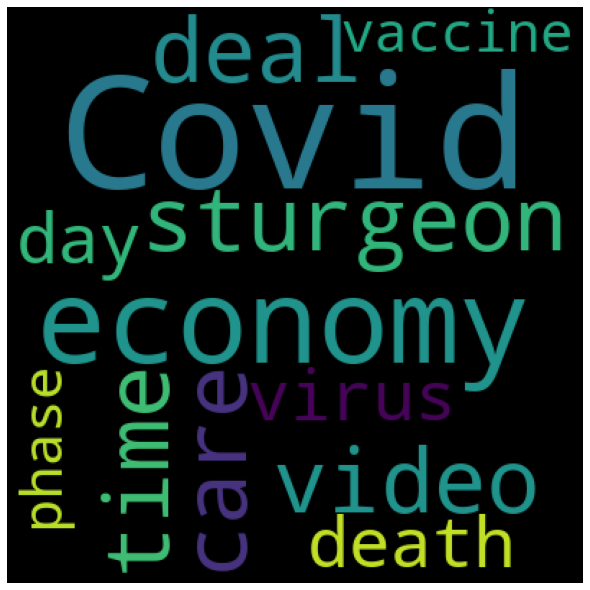

In [21]:
import wordcloud 
str_words = " ".join(words)
wordcloud = wordcloud.WordCloud(width = 400, height = 400, 
                background_color ='black',
                min_font_size = 10).generate(str_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()